# Reporte escrito 1

In [ ]:
# Instala dependencias
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/BaseReporte1.sav
!pip install pingouin
!pip install pyreadstat

En las respuestas deben indicar:

- Hipótesis de trabajo e hipótesis estadísticas, de manera correspondiente.
- Resultados de prueba de normalidad para las distribuciones de las variables de estudio.
- Indicadores estadísticos utilizados (SW, M, Mdn, DE, t, U, F, r) el valor p
correspondiente, y la magnitud según criterios de Cohen, de ser pertinente.
- Redacción de las conclusiones.

>Nota: reportar la normalidad de las distribuciones en base a la prueba Shapiro-Wilk. Para
efectos de este reporte, NO consideren asimetría y curtosis para decidir la prueba estadística a
utilizar

En una investigación sobre los recursos que facilitan la adaptación a la pandemia por COVID-19 en la adultez media (40 a 60 años) se contó con información sobre optimismo, mindfulness-rasgo y miedo al COVID-19. 

El estudio contó con la participación de 90 adultas, y adultos, quienes completaron el protocolo de estudio en línea. Además de los constructos de estudio, se recolectaron datos generales de sexo de las/los participantes, edad en años, si se encuentran en una relación de pareja, o no, y si consumen alcohol semanalmente.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

df = pd.read_spss("BaseReporte1.sav")
df

,Código,Edad,Sexo,Pareja,Cons_alcohol,Optimismo,Mindful,Miedo_COV
0,001,53.0,Mujer,Si,Sí,47.0,37.0,55.0
1,002,49.0,Mujer,No,No,36.0,39.0,41.0
2,003,57.0,Hombre,Si,Sí,54.0,25.0,42.0
3,004,55.0,Hombre,No,No,68.0,38.0,53.0
4,005,52.0,Mujer,No,No,50.0,42.0,46.0
...,...,...,...,...,...,...,...,...
85,086,46.0,Mujer,No,No,44.0,52.0,47.0
86,087,44.0,Hombre,Si,Sí,58.0,35.0,56.0
87,088,58.0,Hombre,No,Sí,54.0,33.0,50.0
88,089,43.0,Mujer,Si,No,50.0,22.0,49.0


/home/renato/.virtualenvs/stats/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/home/renato/.virtualenvs/stats/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## Pregunta 1

Las evidencias indican que existiría una diferencia en el nivel de **optimismo** según el **sexo de las/los participantes**, con las mujeres puntuando más bajo que los hombres. Plantea y lleva a cabo los análisis estadísticos correspondientes y describe lo encontrado (8 pts).                    

HT: Hay una diferencia en el nivel de optimismo en la muestra, con las mujeres puntuando más bajo que los hombres.
- H0: $\mu_{Mujeres}  = \mu_{Hombres}$
- H1: $\mu_{Mujeres}  < \mu_{Hombres}$


In [9]:
df.groupby("Sexo").describe()["Optimismo"]

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
Hombre,41.0,54.926829,8.013708,38.0,49.0,54.0,60.0,68.0
Mujer,49.0,50.489796,9.169975,30.0,42.0,50.0,56.0,69.0


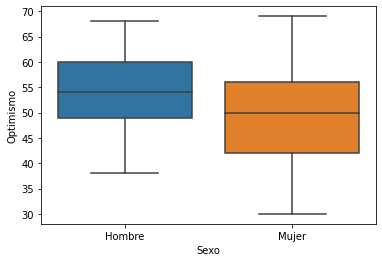

In [10]:
sns.boxplot(x="Sexo", y="Optimismo", data=df)
plt.show()

In [13]:
pg.normality(data=df, dv="Optimismo", group="Sexo", method="shapiro")

,W,pval,normal
Mujer,0.982450,0.671022,True
Hombre,0.966775,0.269433,True


Las distribuciones de optimismo en mujeres (SW=.98, p=.67) como en hombres (SW=.97, p=.27) fueron normales. Por lo tanto, se usará el análisis paramétrico de contraste de dos muestras independientes t de Student.

In [14]:
pg.homoscedasticity(data=df, dv="Optimismo", group="Sexo")

,W,pval,equal_var
levene,1.101196,0.296877,True


La prueba de Levene resultó no significativa, F=1.10, p=.30, por lo que se asumen varianzas iguales entre los grupos.

In [15]:
mujer = df.query('Sexo == "Mujer"')["Optimismo"]
hombre = df.query('Sexo == "Hombre"')["Optimismo"]


pg.ttest(mujer, hombre, alternative="less", correction="False", paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.419722,88,less,0.008795,"[-inf, -1.39]",0.51215,5.559,0.775235


El resultado del análisis de comparación fue significativo, t(88)=-2.42, p=.009 (unilateral), con las mujeres puntuando más bajo en optimismo (M=50.49, DE=9.17) que los hombres (M=54.93, DE=8.01).

En conclusión, los resultados apoyan la idea que el nivel de optimismo varía según el sexo de la, o el participante, con las mujeres puntuando más bajo que los hombres, en promedio. Así, la hipótesis de trabajo se cumple en el estudio.

## Pregunta 2

El grupo de investigación quiere conocer si el mindfulness rasgo reportado varía según si se consume alcohol, o no ¿Existen evidencias de ello en el estudio? (8 pts).

HT: El mindfulness rasgo variaría según se consume alcohol, o no.
- H0: $\mu_{Consume}  = \mu_{No Consume}$
- H1: $\mu_{Consume}  \neq \mu_{No consume}$

In [16]:
df.groupby("Cons_alcohol").describe()["Mindful"]

,count,mean,std,min,25%,50%,75%,max
Cons_alcohol,,,,,,,,
No,54.0,37.481481,10.359101,20.0,30.0,38.0,45.5,58.0
Sí,36.0,40.027778,12.001157,22.0,29.5,39.0,52.0,57.0


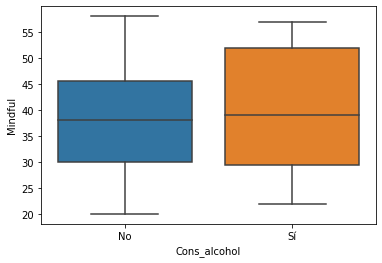

In [17]:
sns.boxplot(x="Cons_alcohol", y="Mindful", data=df)
plt.show()

In [19]:
pg.normality(data=df, dv="Mindful", group="Cons_alcohol", method="shapiro")

,W,pval,normal
Sí,0.906331,0.005107,False
No,0.967370,0.147378,True


La distribución de mindfulness en personas que reportaron no consumir alcohol semanalmente fue normal, SW=.97, p=.15, mientras que en aquellas que sí consumen fue no normal, SW=.91, p=.005. Por lo tanto, se usará el análisis no paramétrico de contraste de dos muestras independientes U de Mann Whitney.

In [25]:
consume = df.query('Cons_alcohol == "Sí"')["Mindful"]
no_consume = df.query('Cons_alcohol == "No"')["Mindful"]


pg.mwu(consume, no_consume, alternative="two-sided")

,U-val,alternative,p-val,RBC,CLES
MWU,1087.5,two-sided,0.342971,-0.118827,0.559414


El análisis de comparación resultó no significativo, U=856.5, p=.34 por lo que no existe diferencia en los puntajes de mindfulness entre quienes consumen alcohol semanalmente (Mdn=39, DE=12.00) y los/las que no (Mdn=38, DE=10.36).

En conclusión, no existe sustento para decir que el mindfulness varía según las/los participantes consuman, o no, alcohol semanalmente.

## Pregunta 3

Describe la muestra de acuerdo con las variables sociodemográficas reportadas y señala el tipo de variable y los estadísticos descriptivos que mejor brinden información sobre ellas (4 pts).

In [36]:
df["Edad"].describe()

count    90.00000
mean     49.80000
std       5.91171
min      40.00000
25%      44.00000
50%      50.00000
75%      55.00000
max      60.00000
Name: Edad, dtype: float64

In [33]:
pd.crosstab(df["Sexo"], columns="Porcentaje", normalize=True)

col_0,Porcentaje
Sexo,
Hombre,0.455556
Mujer,0.544444


In [32]:
pd.crosstab(df["Pareja"], columns="Porcentaje", normalize=True)

col_0,Porcentaje
Pareja,
No,0.422222
Si,0.577778


In [31]:
pd.crosstab(df["Cons_alcohol"], columns="Porcentaje", normalize=True)

col_0,Porcentaje
Cons_alcohol,
No,0.6
Sí,0.4


- La edad es una variable continua y numérica por lo que es más adecuado considerar la media, es decir el promedio de las edades de las/los participantes. Para dispersión se consideraría la desviación estándar y los valores mínimo y máximo (rango).

- El sexo es una variable cualitativa y nominal por lo que resulta adecuado reportar las frecuencias o porcentajes de cada valor, mujer u hombre.

- Estar en una relación de pareja es una variable cualitativa y nominal por lo que sería adecuado indicar las frecuencias o porcentajes de quienes estén en una relación de pareja y las/los que no lo están.

- El consumo de alcohol es una variable cualitativa y nominal. Como en el caso anterior, se reportaría las frecuencias o porcentajes de quienes consumen alcohol semanalmente y quienes no.

>Descripción: La muestra estuvo compuesta por 90 personas en la adultez media, 54.4% mujeres y 45.6% hombres, con edades entre 40 a 60 años (M=49.8, DE=5.91). El 57.8% reportó encontrarse en una relación de pareja mientras que el 42.2% no lo está. Finalmente, el 40% indicó consumir algún tipo de alcohol semanalmente, mientras que el 60% no lo hace.